In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:
directory = r'C:\Users\Desktop\Painting\Train'

In [3]:
datagen = ImageDataGenerator(
    rescale=1.0/255.,
    horizontal_flip=True,
    validation_split = 0.2    
)

In [4]:
image_height = 150
image_width = 150
batch_size = 28
num_classes = 10

train_batches = datagen.flow_from_directory(
    directory,
    subset = 'training',
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode = 'categorical'
)

validation_batches = datagen.flow_from_directory(
    directory,
    subset = 'validation',
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode = 'categorical'
)

Found 880 images belonging to 10 classes.
Found 220 images belonging to 10 classes.


In [5]:
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_batches,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, 150, 150, 3], [None, num_classes])
)

validation_dataset = tf.data.Dataset.from_generator(
    lambda: validation_batches,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, 150, 150, 3], [None, num_classes])
)

In [6]:
train_dataset = train_dataset.repeat(25)
validation_dataset = validation_dataset.repeat(25)

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(
    train_dataset, 
    validation_data=validation_dataset, 
    epochs=50, 
    steps_per_epoch= 150, 
    validation_steps= 75
    # verbose=2
)

Epoch 1/50
150/150 [==============================] - 51s 340ms/step - loss: 1.8973 - accuracy: 0.2788 - val_loss: 1.9129 - val_accuracy: 0.3149
Epoch 2/50
150/150 [==============================] - 52s 344ms/step - loss: 1.5795 - accuracy: 0.4141 - val_loss: 1.8137 - val_accuracy: 0.3910
Epoch 3/50
150/150 [==============================] - 52s 347ms/step - loss: 1.3533 - accuracy: 0.5182 - val_loss: 1.6735 - val_accuracy: 0.4172
Epoch 4/50
150/150 [==============================] - 53s 354ms/step - loss: 1.1366 - accuracy: 0.5967 - val_loss: 1.5803 - val_accuracy: 0.4617
Epoch 5/50
150/150 [==============================] - 54s 359ms/step - loss: 0.9404 - accuracy: 0.6646 - val_loss: 1.6230 - val_accuracy: 0.5039
Epoch 6/50
150/150 [==============================] - 55s 366ms/step - loss: 0.7498 - accuracy: 0.7250 - val_loss: 1.8585 - val_accuracy: 0.4952
Epoch 7/50
150/150 [==============================] - 63s 424ms/step - loss: 0.5618 - accuracy: 0.8051 - val_loss: 2.0623 - val_ac

In [10]:
test_images = r"C:\Users\Desktop\Painting\Validation\Test"

predictions = []

for img in os.listdir(test_images):
    image = load_img(os.path.join(test_images, img), target_size=(150, 150))

    image = img_to_array(image)

    image = np.expand_dims(image, axis=0)

    image = image / 255.0

    prediction = model.predict(image)

    class_name = list(train_batches.class_indices.keys())[list(train_batches.class_indices.values()).index(np.argmax(prediction))]

    predictions.append({img: class_name})

for prediction in predictions:
    for img_name, class_name in prediction.items():
        print(f"Image: {img_name}, Predicted Class: {class_name}")

1/1 [==============================] - 0s 11ms/step
Image: Pablo_Picasso_109.jpg, Predicted Class: Vincent_van_Gogh
Image: Rembrandt_180.jpg, Predicted Class: Rembrandt
Image: Paul_Gauguin_229.jpg, Predicted Class: Vincent_van_Gogh
Image: Titian_107.jpg, Predicted Class: Titian
Image: Amedeo_Modigliani_71.jpg, Predicted Class: Edgar_Degas
Image: Rene_Magritte_3.jpg, Predicted Class: Vincent_van_Gogh
Image: Alfred_Sisley_253.jpg, Predicted Class: Alfred_Sisley
Image: Vincent_van_Gogh_76.jpg, Predicted Class: Vincent_van_Gogh
Image: Pierre-Auguste_Renoir_40.jpg, Predicted Class: Pierre-Auguste_Renoir
Image: Edgar_Degas_116.jpg, Predicted Class: Pablo_Picasso


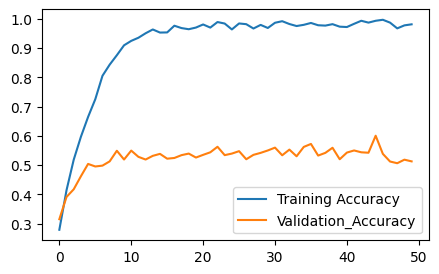

In [12]:
plt.figure(figsize=(5, 3))

epochs_range= range(50)

plt.plot(epochs_range, history.history['accuracy'])

plt.plot(epochs_range, history.history['val_accuracy'])

plt.legend(['Training Accuracy', 'Validation_Accuracy'])